In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
def calculate_price(purchase_data):
    """
    Calculates the price of each item from purchase data.

    Args:
        file_path (str): The path to the Excel file containing purchase data.

    Returns:
        numpy.ndarray: An array containing the price of each item.
    """
    A = purchase_data.iloc[:, 1:4]
    C = purchase_data.iloc[:, 4]
    A_INV = np.linalg.pinv(A)
    price_of_each_item = (A_INV @ C)
    return price_of_each_item, A, C

FILE = '../Datasets/Lab Session Data.xlsx'

purchase_data = pd.read_excel(FILE, sheet_name='Purchase data', usecols='A:E')
price_of_each_item, A, C = calculate_price(purchase_data)

print("Dimensionality of the vector space:", purchase_data.shape)
print("Number of vectors:", purchase_data.shape[0])
print("Rank of matrix A:", np.linalg.matrix_rank(A))
print("Price of each item:", price_of_each_item)

Dimensionality of the vector space: (10, 5)
Number of vectors: 10
Rank of matrix A: 3
Price of each item: [ 1. 55. 18.]


In [29]:
x = price_of_each_item
print("Vector X:", x) 

Vector X: [ 1. 55. 18.]


In [30]:
def classify_customers(data_series, threshold):
    """
    Classifies customers as "RICH" or "POOR" based on their payment amount.

    Args:
        data_series (pandas.Series): A series containing payment amounts.
        threshold (float): The threshold value for classification.

    Returns:
        pandas.DataFrame: A DataFrame with payment amounts and corresponding classifications.
    """
    classification = ["RICH" if x > threshold else "POOR" for x in data_series]
    data = data_series.to_frame()
    data["Classification"] = classification
    return data

def find_closest_customer(data, payment):
    """
    Finds the customer with the closest payment to a given payment amount.

    Args:
        data (pandas.DataFrame): A DataFrame with payment amounts and classifications.
        payment (float): The payment amount to compare with.

    Returns:
        str: The classification of the customer with the closest payment.
    """
    d1_dist = {classification: abs(customer_payment - payment) for index, customer_payment, classification in data.itertuples()}
    return min(d1_dist, key=d1_dist.get)


data = classify_customers(C, 200)
print("Classification of each customer:")
print(data)
print()

pay = 250
closest_customer = find_closest_customer(data, pay)
print("Customer with the closest payment to", pay, ":", closest_customer)

Classification of each customer:
   Payment (Rs) Classification
0           386           RICH
1           289           RICH
2           393           RICH
3           110           POOR
4           280           RICH
5           167           POOR
6           271           RICH
7           274           RICH
8           148           POOR
9           198           POOR

Customer with the closest payment to 250 : RICH


Mean stock price of IRCTC: 1560.6634538152612 INR
Variance of stock price of IRCTC: 58732.36535253918 INR
Mean of stocks on wednesday of IRCTC 1550.7060000000001 INR
Mean of stocks of April of IRCTC 1698.9526315789474 INR
Probability of loss in IRCTC stock price 0.4979919678714859
Probability of profit on Wednesday in IRCTC stock price 0.08433734939759036
Probability of profit given Wednesday in IRCTC stock price 0.42


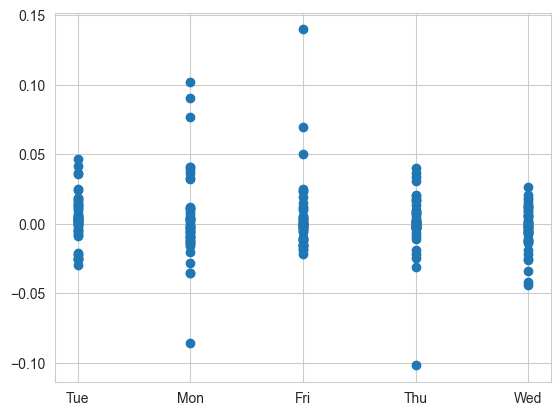

In [31]:
def analyze_stock_price(file_path):
    """
    Analyzes stock price data and calculates various statistics.

    Args:
        file_path (str): The path to the Excel file containing stock price data.

    Returns:
        tuple: A tuple containing the calculated statistics and the scatter plot data.
    """
    irctc_stock_price = pd.read_excel(file_path, sheet_name="IRCTC Stock Price")

    mean_price = irctc_stock_price["Price"].mean()
    variance_price = irctc_stock_price["Price"].var()
    mean_wed_price = irctc_stock_price[irctc_stock_price["Day"] == "Wed"]["Price"].mean()
    mean_apr_price = irctc_stock_price[irctc_stock_price["Month"] == "Apr"]["Price"].mean()
    prob_loss = len(irctc_stock_price[irctc_stock_price["Chg%"] < 0]) / len(irctc_stock_price)
    prob_profit_wed = len(irctc_stock_price[(irctc_stock_price["Chg%"] > 0) & (irctc_stock_price["Day"] == "Wed")]) / len(irctc_stock_price)
    prob_profit_given_wed = len(irctc_stock_price[(irctc_stock_price["Chg%"] > 0) & (irctc_stock_price["Day"] == "Wed")]) / len(irctc_stock_price[irctc_stock_price["Day"] == "Wed"])

    scatter_data = (irctc_stock_price["Day"], irctc_stock_price["Chg%"])

    return mean_price, variance_price, mean_wed_price, mean_apr_price, prob_loss, prob_profit_wed, prob_profit_given_wed, scatter_data


mean_price, variance_price, mean_wed_price, mean_apr_price, prob_loss, prob_profit_wed, prob_profit_given_wed, scatter_data = analyze_stock_price(FILE)

print("Mean stock price of IRCTC:", mean_price, "INR")
print("Variance of stock price of IRCTC:", variance_price, "INR")
print("Mean of stocks on wednesday of IRCTC", mean_wed_price, "INR")
print("Mean of stocks of April of IRCTC", mean_apr_price, "INR")
print("Probability of loss in IRCTC stock price", prob_loss)
print("Probability of profit on Wednesday in IRCTC stock price", prob_profit_wed)
print("Probability of profit given Wednesday in IRCTC stock price", prob_profit_given_wed)

plt.scatter(scatter_data[0], scatter_data[1])
plt.show()

In [32]:
def analyze_thyroid_data(thyroid_data):
    """
    Analyzes thyroid data and generates a summary table.

    Args:
        thyroid_data (pandas.DataFrame): The path to the Excel file containing thyroid data.

    Returns:
        pandas.DataFrame: A DataFrame summarizing the data analysis.
    """

    columns = thyroid_data.columns
    data_types = thyroid_data.dtypes
    categorical = ["Categorical" if data_type == "object" else "Numerical" for data_type in data_types]
    data_range = [f"{thyroid_data[column].min()} - {thyroid_data[column].max()}" if data_type == "int64" or data_type == "float64" else "N/A" for column, data_type in zip(columns, data_types)]
    missing_values = [thyroid_data[column].isnull().sum() for column in columns]
    outliers = [thyroid_data[column][thyroid_data[column] > thyroid_data[column].mean() + 3 * thyroid_data[column].std()].count() if thyroid_data[column].dtype == "int64" or thyroid_data[column].dtype == "float64" else "N/A" for column in columns]
    mean = [thyroid_data[column].mean() if data_type == "int64" or data_type == "float64" else "N/A" for column, data_type in zip(columns, data_types)]
    variance = [thyroid_data[column].var() if data_type == "int64" or data_type == "float64" else "N/A" for column, data_type in zip(columns, data_types)]

    data = pd.DataFrame({
        "Data Type": data_types,
        "Categorical/Numerical": categorical,
        "Data Range": data_range,
        "Number of Missing Values": missing_values,
        "Outliers": outliers,
        "Mean": mean,
        "Variance": variance
    })

    return data

raw_thyroid = pd.read_excel(FILE, sheet_name='thyroid0387_UCI', na_values='?', usecols='B:AE')
data = analyze_thyroid_data(raw_thyroid)
data

,Data Type,Categorical/Numerical,Data Range,Number of Missing Values,Outliers,Mean,Variance
age,int64,Numerical,1 - 65526,0,3,73.555822,1401800.868871
sex,object,Categorical,N/A,307,N/A,N/A,N/A
on thyroxine,object,Categorical,N/A,0,N/A,N/A,N/A
query on thyroxine,object,Categorical,N/A,0,N/A,N/A,N/A
on antithyroid medication,object,Categorical,N/A,0,N/A,N/A,N/A
sick,object,Categorical,N/A,0,N/A,N/A,N/A
pregnant,object,Categorical,N/A,0,N/A,N/A,N/A
thyroid surgery,object,Categorical,N/A,0,N/A,N/A,N/A
I131 treatment,object,Categorical,N/A,0,N/A,N/A,N/A
query hypothyroid,object,Categorical,N/A,0,N/A,N/A,N/A
